In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('data_model2.xlsx')

In [3]:
data = data[['y3', 'x5', 'x6', 'x7', 'x15', 'x16']]

In [4]:
data.head()

,y3,x5,x6,x7,x15,x16
0,13.26,0.78,0.40,1.37,166.32,10.08
1,10.16,0.75,0.26,1.49,92.88,14.76
2,13.72,0.68,0.40,1.44,158.04,6.48
3,12.85,0.70,0.50,1.42,93.96,21.96
4,10.63,0.62,0.40,1.35,173.88,11.88


In [5]:
data.corr().to_excel('corr.xlsx')

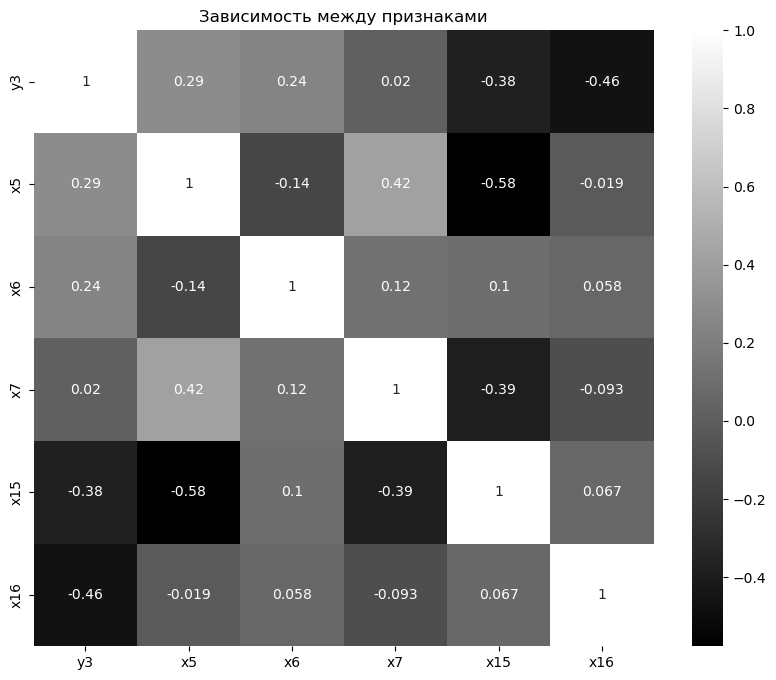

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='gray')
plt.title('Зависимость между признаками');

In [7]:
X = data[['x5', 'x6', 'x7', 'x15', 'x16']]
y = data['y3']

In [8]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Добавим константу для интерсепта
X = sm.add_constant(X)

# Множественная линейная регрессия с использованием statsmodels
model = sm.OLS(y, X).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     4.091
Date:                Thu, 03 Oct 2024   Prob (F-statistic):             0.0109
Time:                        10:06:46   Log-Likelihood:                -70.209
No. Observations:                  25   AIC:                             152.4
Df Residuals:                      19   BIC:                             159.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0588     21.110      0.950      0.354     -24.125      64.242
x5            31.6007     24.877      1.270      0.219     -20.468      83.669
x6            15.6029      6.747      2.313      0.032       1.481      29.725
x7           -16.2764      9.306     -1.749      0.096     -35.754       3.201
x15           -0.0523      0.029     -1.807      0.087      -0.113       0.008
x16           -0.4826      0.160     -3.008      0.007      -0.819      -0.147
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.461
Skew:                           0.079   Prob(JB):                        0.794
Kurtosis:                       2.353   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
reg = LinearRegression()
reg.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = reg.predict(X_test)

# Оценка модели по метрике MSE
mse = mean_squared_error(y_test, y_pred)

In [12]:
from sklearn.linear_model import Lasso

In [13]:
# Модель Lasso-регрессии
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

# Предсказания
y_pred_lasso = lasso.predict(X_test)

# Оценка модели
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_lasso

8.755092302471649

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем объект PCA и обучаем его на данных
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Доли дисперсии, объясненные каждой компонентой
explained_variance = pca.explained_variance_ratio_

# Кумулятивная доля объясненной дисперсии
cumulative_variance = pca.explained_variance_ratio_.cumsum()

Explained variance by each component: [0.38970552 0.21747562 0.19872324 0.11154031 0.08255531 0.        ]
Cumulative explained variance: [0.38970552 0.60718114 0.80590437 0.91744469 1.         1.        ]


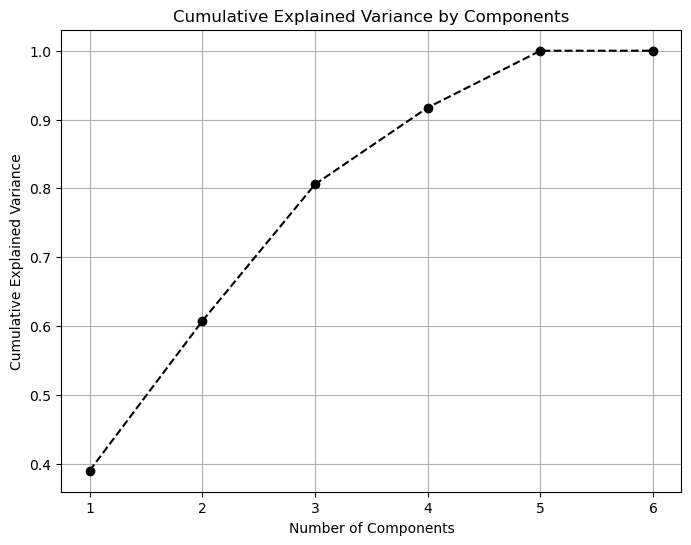

In [37]:
# Визуализация долей дисперсии
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='black')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True);

In [53]:
pca = PCA(n_components=5)
X_pca_reduced = pca.fit_transform(X_scaled)

# Вывод главных компонент
print("Главные компоненты:")
print(pca.components_)


Главные компоненты:
[[-0.         -0.60427758  0.09673618 -0.50961375  0.59468563  0.11015238]
 [ 0.         -0.07608522  0.88809182  0.37784098  0.05682711  0.24394842]
 [-0.          0.17811332 -0.17684156 -0.14886169 -0.09411976  0.95183211]
 [-0.         -0.16839877 -0.39510979  0.73924673  0.50376983  0.12353276]
 [-0.          0.75430574  0.12062483 -0.16995437  0.61682826 -0.0843262 ]]


In [58]:
# Применение PCA с 5 главными компонентами
pca = PCA(n_components=5)
X_pca_reduced = pca.fit_transform(X_scaled)

# Проверим долю объясненной дисперсии для каждой из 5 компонент
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Кумулятивная доля объясненной дисперсии
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(f'Cumulative explained variance: {cumulative_variance}')


Explained variance by each component: [0.38970552 0.21747562 0.19872324 0.11154031 0.08255531]
Cumulative explained variance: [0.38970552 0.60718114 0.80590437 0.91744469 1.        ]


Explained variance by each component: [0.38970552 0.21747562 0.19872324 0.11154031 0.08255531 0.        ]
Cumulative explained variance: [0.38970552 0.60718114 0.80590437 0.91744469 1.         1.        ]

In [62]:
X_scaled

array([[ 0.        ,  0.93300374,  0.91540765,  0.38472358,  1.46237119,
        -0.61721722],
       [ 0.        ,  0.30259581, -0.07345864,  1.4339697 , -0.38133358,
         0.19163599],
       [ 0.        , -1.16835603,  0.91540765,  0.99678382,  1.25450252,
        -1.239412  ],
       [ 0.        , -0.74808408,  1.62174071,  0.82190946, -0.35422027,
         1.43602555],
       [ 0.        , -2.42917189,  0.91540765,  0.20984923,  1.65216433,
        -0.30611983],
       [ 0.        ,  0.51273178, -0.56789178,  0.55959793,  1.36144944,
        -0.18168088],
       [ 0.        , -0.11767615, -0.14409195, -1.45145714, -0.4897868 ,
        -0.36833931],
       [ 0.        , -0.5379481 ,  1.19794088, -0.48964819, -0.1734649 ,
        -0.92831461],
       [ 0.        , -0.95822005, -0.7091584 , -1.45145714,  1.46237119,
        -0.36833931],
       [ 0.        , -0.11767615,  0.84477434, -0.66452255,  0.82068963,
         3.24039042],
       [ 0.        , -1.16835603,  0.42097451, -1.

In [63]:
components_df = pd.DataFrame(pca.components_, columns=['y3', 'x5', 'x6', 'x7', 'x15', 'x16'])

In [66]:
data.head()

,y3,x5,x6,x7,x15,x16
0,13.26,0.78,0.40,1.37,166.32,10.08
1,10.16,0.75,0.26,1.49,92.88,14.76
2,13.72,0.68,0.40,1.44,158.04,6.48
3,12.85,0.70,0.50,1.42,93.96,21.96
4,10.63,0.62,0.40,1.35,173.88,11.88


In [68]:
components_df.to_excel('components_df.xlsx')